# NLP

## Framework & Library

1. 텐서플로우(Tensroflow)
 - 구글에서 2015년에 공개한 ML 오픈소스 라이브러리
 - install
     - pip install tensorflow
     - import tensorflow as tf
     - tf.__version__  
 
2. 케라스(Keras)
 - 텐서플로우에 대한 추상화 된 API를 제공
 - install
     - pip install keras
     - import keras
     - keras.__version__  
     
3. 젠심(Gensim)
 - ML을 사용한 토픽 모델링과 자연어 처리를 수행할 수 있는 오픈소스 라이브러리
 - install
     - pip install gensim
     - import gensim
     - gensim.__version__  
     
4. 사이킷런(Scikit-learn)
 - 파이썬 ML 라이브러리 --> iris등 다양한 데이터를 제공
 - install
     - pip install scikit-learn
     - import sklearn
     - sklearn.__version__  

### 자연어 처리를 위한 NLTK, KoNLPy

1. NLTK
 - 자연어 처리를 위한 파이썬 패키지 (anaconda에 기본적으로 설치된 패키지)
 - install
     - pip install nltk
     - import nltk
     - nltk.__version__  
     - nltk.download()

NLTK 에러
1-1. 
```
LookupError: 
**********************************************************************
Resource treebank not found.
Please use the NLTK Downloader to obtain the resource:
>>> import nltk
>>> nltk.download('treebank')
**********************************************************************
```

1-2. 설치시 에러 발생한 경우
링크 : [github](https://github.com/nltk/nltk_data)

---

2. KoNLPy
 - 자연어 처리를 위한 파이썬 패키지 (anaconda에 기본적으로 설치된 패키지)
 - install
     - pip install konlpy
     - import konlpy
     - konlpy.__version__  
     
2-1. Window에서 KoNLPy에러 발생하는 경우
 - 1. JDK 설치 ([설치주소](https://www.oracle.com/technetwork/java/javase/downloads/index.html))  
 경로 예시 : C:\Program Files\Java\jdk-11.0.1
 
 - 2. JDK 환경 변수 설정
   - 제어판 > 시스템 및 보안 > 시스템 > 고급 시스템 설정 > 고급 > 환경 변수  -> JAVA_HOME이라는 환경변수 설치

<div style="text-align: left;">
  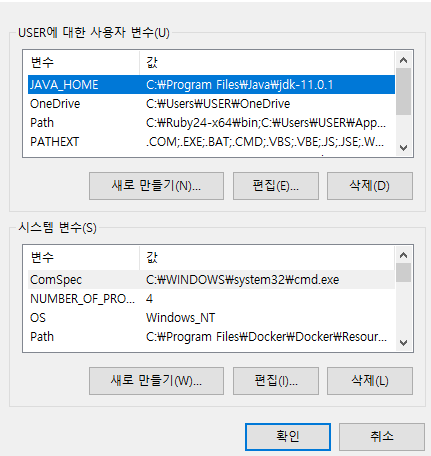
</div>

 - 3. JPype 설치
   - ex_ 파이썬 3.x , window64
   - pip install JPype1-0.6.3-cp36-cp36m-win_amd64.whl

### 텍스트 전처리

- 1. Tokenization(토큰화)
    - 주어진 코퍼스(corpus)에서 토큰(token)이라 불리는 단위로 나누는 작업
    - Input : Time is an illusion. Lunchtime double so!
    - Output : "Time", "is", "an", "illustion", "Lunchtime", "double", "so"
    
- 2. 토큰화 기준을 선택하는 것
  - Don't be ~
    - Don't
    - Don t
    - Dont
    - Do n't
    
  - NLTK는 영어 단어를 토큰화 하기위한 도구를 제공해줍니다.

In [12]:
import tensorflow as tf
import keras
import gensim
import sklearn

import nltk
import konlpy

In [10]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rntjdwns\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [15]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

print('단어 토큰화1 :',word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화1 : ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


위 결과 "Do", "n't" 반면 'Jone', "'s" 로 분리했습니다. 

In [17]:
print('단어 토큰화2 :',WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화2 : ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


WordPunctTokenizer같은 경우 구두점을 별도로 분류하는 특징을 가지고 있습니다.     
Don't를 Don과 '와 t, Jone's를 Jone과 '와 s로 분리해서 나타냈습니다.

In [18]:
print('단어 토큰화3 :',text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화3 : ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


기본적으로 모든 알파벳을 소문자로 바꾸면서 마침표나 컴마, 느낌표 등의 구두점을 제거하지만 don't나 jone's와 같은 경우 아포스트로피는 보존해주는 특징을 보입니다.

3. 토큰화에서 고려할 사항
  - 1. 구두점이나 특수 문자를 단순 제외하면 안된다.
    - 구두점이나 특수 문자를 단순히 제외하는 것은 X
    - 정제 작업을 진행하다보면 구두점조차 하나의 토큰으로 분류하기도 한다.
    - 마침표(.)같은 경우 문장의 경계를 알 수 있기에 제외하지 않을 수 있다.
    - 추가적으로 $12.5는 가격을 의미하고 24/07/14는 날짜를 의미하기때문에 분류하지 않는게 좋습니다.
  - 2. 줄임말과 단어 내에 띄어쓰기가 있는 경우
    - 영어는 '를 사용해 단어를 줄이는 경우가 있습니다. ex) I am -> I'm

In [22]:
## 표준 토큰화 예제

from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

text = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
print('트리뱅크 워드토크나이저 :',tokenizer.tokenize(text))

트리뱅크 워드토크나이저 : ['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


출력 결과를 보면 home-based는 하나의 토큰으로 취급하고 있으며, dosen't의 경우 does와 n't는 분리되어 있습니다.

### 문장 토큰화(Sentence Tokenization)
토큰의 단위가 문장일 경우입니다. corpus에서 문장 단위 작업을 sentence segmentation 즉, 문장 분류라고 합니다.  
corpus가 정제되어 있지 않은 상태라면 용도에 맞게 문장 토큰이 필요할 수 있습니다.  

In [25]:
# NLTK에서는 영어 문장의 토큰화를 수행하는 sent_tokenize 패키지를 가지고 있습니다.
from nltk.tokenize import sent_tokenize

text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
print('문장 토큰화1 :',sent_tokenize(text))
print('\n')
text = "I am actively looking for Ph.D. students. and you are a Ph.D student."
print('문장 토큰화2 :',sent_tokenize(text))

문장 토큰화1 : ['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


문장 토큰화2 : ['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


NLTK의 sent_tokenize는 Ph.D. 를 문장의 단어로 인식하는 것을 볼 수 있습니다.


In [28]:
# KSS(Korean Sentence Splitter)
# 한국어에 대한 문장 토큰화 도구
pip install kss


     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ------------- -------------------------- 0.4/1.1 MB 11.2 MB/s eta 0:00:01
     ---------------------------------- ----- 1.0/1.1 MB 12.2 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for emoji==1.2.0 from https://files.pythonhosted.org/packages/24/fa/b3368f41b95a286f8d300e323449ab4e86b85334c2e0b477e94422b8ed0f/emoji-1.2.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/26.4 MB ? eta -:--:--
     - -------------------------------------- 0.9/26.4 MB 27.4 MB/s eta 0:00:01
     -- ------------------------------------- 1.9/26.4 MB 23.8 MB/s eta 0:00:02
     ---- ----------------------------------- 3.0/26.4 MB 23.8 MB/s eta 0:00:01
     ------ --------------------------------- 4.4/26.4 MB 25.5 MB/s eta 0:0

In [35]:
import kss
text = "딥러닝 자연어 처리 공부하고 있는 중인데, 영어보다 한국어로 하는게 어렵네? 열심히 해봐야겠어."
print('한국어 문장 토큰화 :',kss.split_sentences(text))

한국어 문장 토큰화 : ['딥러닝 자연어 처리 공부하고 있는 중인데, 영어보다 한국어로 하는게 어렵네?', '열심히 해봐야겠어.']


### 한국어는 왜 토큰화가 어려울까?
- 한국어의 경우 띄어쓰기 단위를 '어절' 이라고 합니다. 어절 토큰화는 단어 토큰화는 다른 과정입니다. 근본적인 이유로는 다른 형태를 가진 교착어이기 때문입니다.

---

1. 교착어
  - 한국어에는 조사가 존재합니다. ex) '그가', '그에게', '그를', '그와', '그는' 처럼 그 뒤에 다양한 조사가 붙는다.
  서로 다른 조사가 붙어 다른 단어로 인식이 될 경우 번거로운 경우가 빈번하게 발생합니다.
  - 따라서 한국어 토큰화에는 형태소(morpheme)라는 개념이 중요합니다. (형태소 : 뜻을 가진 가장 작은 말의 단위)
     - 자립 형태소 : 접사, 어미, 조사와 상관없이 자립하여 사용할 수 있는 형태소. 그 자체로 단어가 된다. <br>
       체언(명사, 대명사, 수사), 수식언(관형사, 부사), 감탄사 등이 있다.
     - 의존 형태소 : 다른 형태소와 결합하여 사용되는 형태소. 접사, 어미, 조사, 어간을 말한다.
     
     ex) 에디가 책을 읽었다. -> ['에디가', '책을', '읽었다']   
     자립 형태소 : 에디, 책   
     의존 형태소 : -가, -을, 읽-, -었, -다
     
     즉, 어절 토큰화가 아닌 형태소 토큰화를 진행해야 영어에서의 토큰화와 유사한 결과를 나타낼 수 있습니다.
     
2. 한국어는 띄어쓰기가 영어보다 지켜지지 않는 경우가 많다.

### 품사 태깅(Part-of-speech tagging)

표기는 같지만 품사에 따라서 단어의 의미가 달라지는 경우가 있습니다.  
ex) fly : 날다, 파리  
ex) 못 : 망치를 사용해 고정하는 물건, 부사) 할 수 없는  

In [39]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

text = "I am actively looking for Ph.D. students. and you are a Ph.D. student."
tokenized_sentence = word_tokenize(text)
# PRP는 인칭 대명사, VBP는 동사, RB는 부사, VBG는 현재부사, IN은 전치사, NNP는 고유 명사, NNS는 복수형 명사, CC는 접속사, DT는 관사
print('단어 토큰화 :',tokenized_sentence)
print('\n')
print('품사 태깅 :',pos_tag(tokenized_sentence))

단어 토큰화 : ['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']


품사 태깅 : [('I', 'PRP'), ('am', 'VBP'), ('actively', 'RB'), ('looking', 'VBG'), ('for', 'IN'), ('Ph.D.', 'NNP'), ('students', 'NNS'), ('.', '.'), ('and', 'CC'), ('you', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('Ph.D.', 'NNP'), ('student', 'NN'), ('.', '.')]


In [40]:
from konlpy.tag import Okt
from konlpy.tag import Kkma

okt = Okt()
kkma = Kkma()

print('OKT 형태소 분석 :',okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 품사 태깅 :',okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 명사 추출 :',okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

OKT 형태소 분석 : ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
OKT 품사 태깅 : [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
OKT 명사 추출 : ['코딩', '당신', '연휴', '여행']


In [41]:
print('꼬꼬마 형태소 분석 :',kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 품사 태깅 :',kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 명사 추출 :',kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

꼬꼬마 형태소 분석 : ['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
꼬꼬마 품사 태깅 : [('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]
꼬꼬마 명사 추출 : ['코딩', '당신', '연휴', '여행']
